In [1]:
from pathlib import Path
import json
from torch.utils.tensorboard import SummaryWriter
import torch
from torchvision import datasets, transforms

from omniglot_one_shot_dataset import OmniglotTransformation, OmniglotOneShotDataset

from cls_module.memory.ltm.visual_component import VisualComponent
from cls_module.memory.stm.aha import AHA
from cls_module.cls import CLS

In [2]:

with open('/mnt/c/Users/pulin/Projects/ProjectAGI/pt-aha/lake/definitions/aha_config.json') as config_file:
  config = json.load(config_file)

batch_size = 20
image_tfms = transforms.Compose([
    transforms.ToTensor(),
    OmniglotTransformation(resize_factor=0.5)
])


In [3]:
study_loader = torch.utils.data.DataLoader(
    OmniglotOneShotDataset('./data', train=True, download=True,
                           transform=image_tfms, target_transform=None),
    batch_size=batch_size, shuffle=False)

x, _ = next(iter(study_loader))


Files already downloaded and verified


In [4]:
pretrained_model_path = '/mnt/c/Users/pulin/Projects/ProjectAGI/pt-aha/lake/runs/20210223-234348/pretrained_model_10.pt'

In [5]:
image_shape = config['image_shape']
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

summary_dir = Path('./runs/in_action')
summary_dir.mkdir(exist_ok=True)
writer = SummaryWriter(log_dir=summary_dir)

model = CLS(image_shape, config, device=device, writer=writer).to(device)
model.load_state_dict(torch.load(pretrained_model_path))
model.reset()

torch.Size([20, 1, 52, 52])
torch.Size([20])
inputs torch.Size([1, 1, 52, 52])
labels torch.Size([1])
stm_ps torch.Size([1, 225])
(15, 15)
stm_pr torch.Size([1, 225])
(15, 15)
stm_pc torch.Size([1, 225])
(15, 15)
stm_recon torch.Size([1, 1, 52, 52])
ltm_vc torch.Size([1, 121, 13, 13])
ltm_recon torch.Size([1, 1, 52, 52])


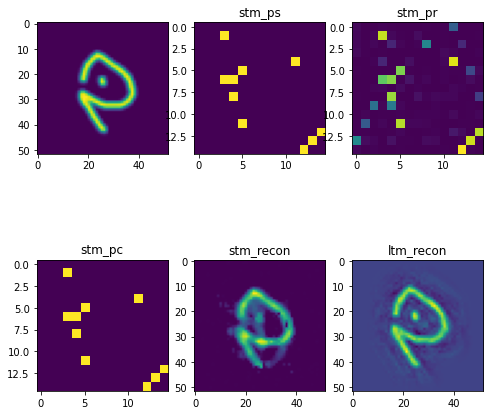

<ipython-input-13-7a98747df1b1>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(2, 3, k)
inputs torch.Size([1, 1, 52, 52])
labels torch.Size([1])
stm_ps torch.Size([1, 225])
(15, 15)
stm_pr torch.Size([1, 225])
(15, 15)
stm_pc torch.Size([1, 225])
(15, 15)
stm_recon torch.Size([1, 1, 52, 52])
ltm_vc torch.Size([1, 121, 13, 13])
ltm_recon torch.Size([1, 1, 52, 52])
<ipython-input-13-7a98747df1b1>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uni

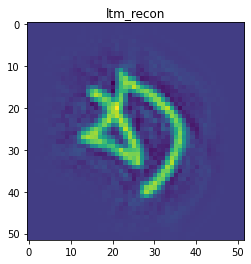

inputs torch.Size([1, 1, 52, 52])
labels torch.Size([1])
stm_ps torch.Size([1, 225])
(15, 15)
stm_pr torch.Size([1, 225])
(15, 15)
stm_pc torch.Size([1, 225])
(15, 15)
stm_recon torch.Size([1, 1, 52, 52])
ltm_vc torch.Size([1, 121, 13, 13])
ltm_recon torch.Size([1, 1, 52, 52])


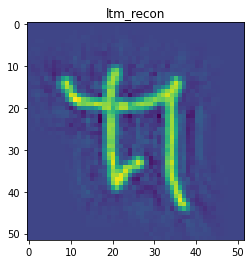

In [13]:

from matplotlib import pyplot as plt
%matplotlib inline

for study in study_loader:
    print(study[0].shape)
    print(study[1].shape)
    for i in range(study[0].shape[0]):
        k = 1
        fig=plt.figure(figsize=(8, 8))
        image = study[0][i,:]
        target = study[1][i]
        fig.add_subplot(2, 3, k)
        plt.imshow(image.squeeze())
        #print(image.unsqueeze(0).shape)
        model(image.unsqueeze(0), target.unsqueeze(0), mode='study')
        for feature in model.features['study']:
            print(feature, model.features['study'][feature].shape)
            if feature not in ['inputs', 'labels', 'ltm_vc']:
                if len(model.features['study'][feature].squeeze().shape)<2:
                    size = model.features['study'][feature].squeeze().shape[0]
                    shape = (int(size**.5), int(size**.5))
                    print(shape)
                    disp = model.features['study'][feature].reshape(shape)
                else:
                    disp = model.features['study'][feature].squeeze()
                k+=1
                fig.add_subplot(2, 3, k)
                plt.imshow(disp)
                plt.title(feature)
        plt.show()
        inp = input()
        if inp == 'q':
            break
    if inp == 'q':
        break
    
    

In [16]:
a = model.features['study'][feature].reshape((52,52))
print(a)



tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])